# <center>Cancer Classification</center>

## Modules

In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping


plt.style.use('ggplot')

## Initialize the dataframe

In [49]:
df = pd.read_csv('data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [51]:
df.drop('Unnamed: 32', axis=1, inplace=True)

In [52]:
df.shape

(569, 32)

## Exploratory Data Analysis

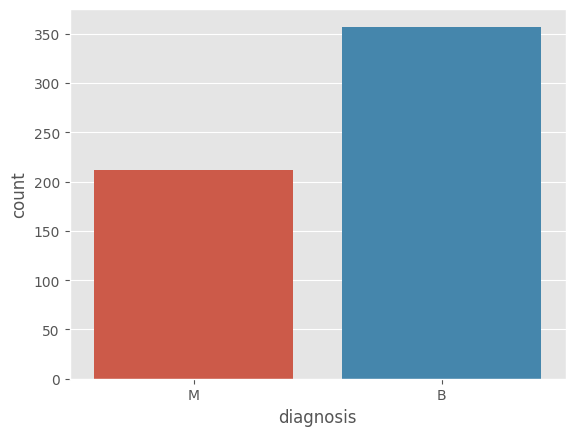

In [53]:
sns.countplot(data=df, x='diagnosis')
plt.show()

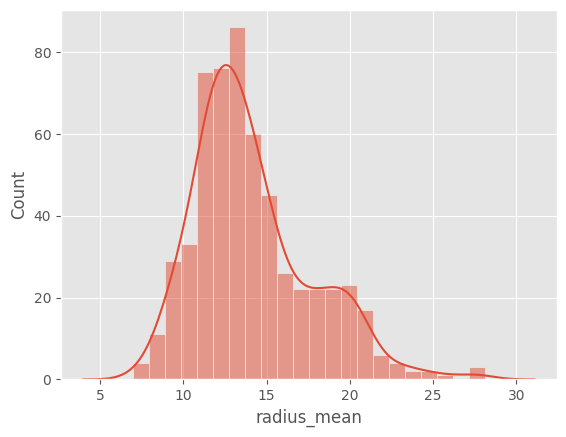

In [54]:
sns.histplot(data=df, x='radius_mean', kde=True, kde_kws=dict(cut=3))
plt.show()

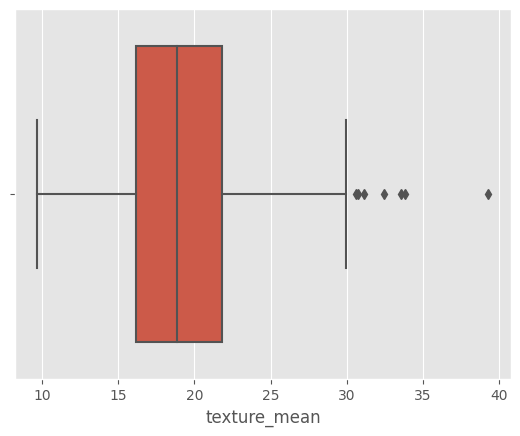

In [55]:
sns.boxplot(data=df, x='texture_mean')
plt.show()

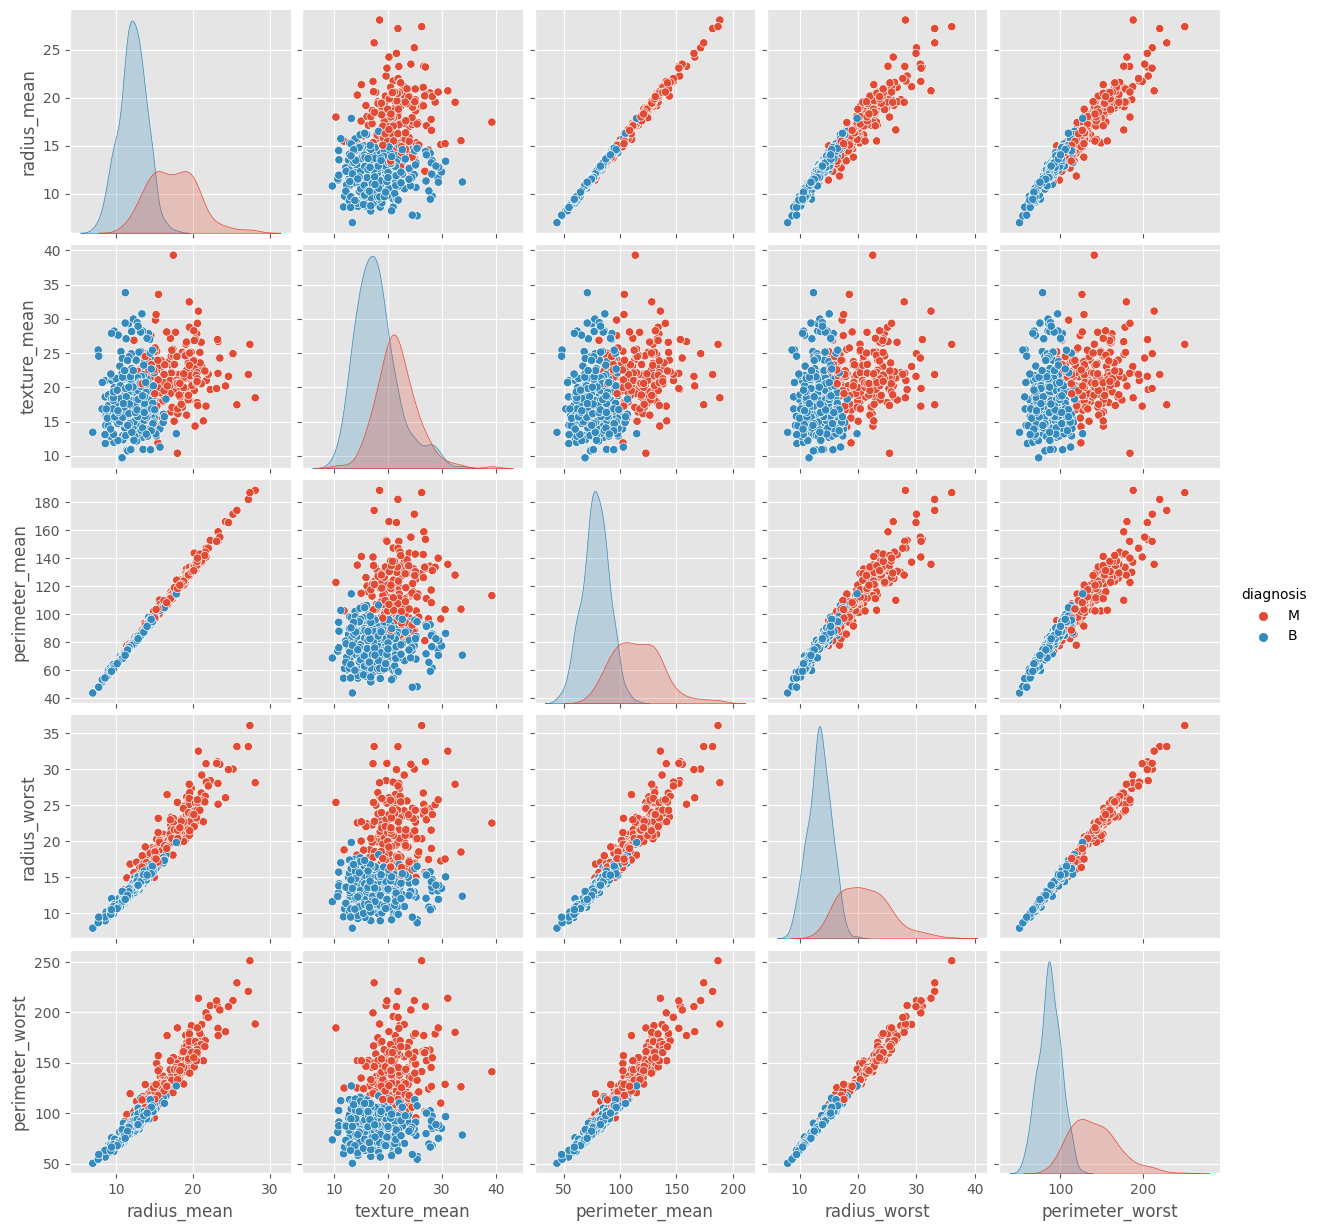

In [56]:
sns.pairplot(df, hue="diagnosis", vars=["radius_mean", "texture_mean", "perimeter_mean", "radius_worst", "perimeter_worst"])
plt.show()

#### Encoding the diagnosis column into 0s and 1s

In [57]:
encoder = LabelEncoder()
df['diagnosis'] = encoder.fit_transform(df['diagnosis'])

In [58]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


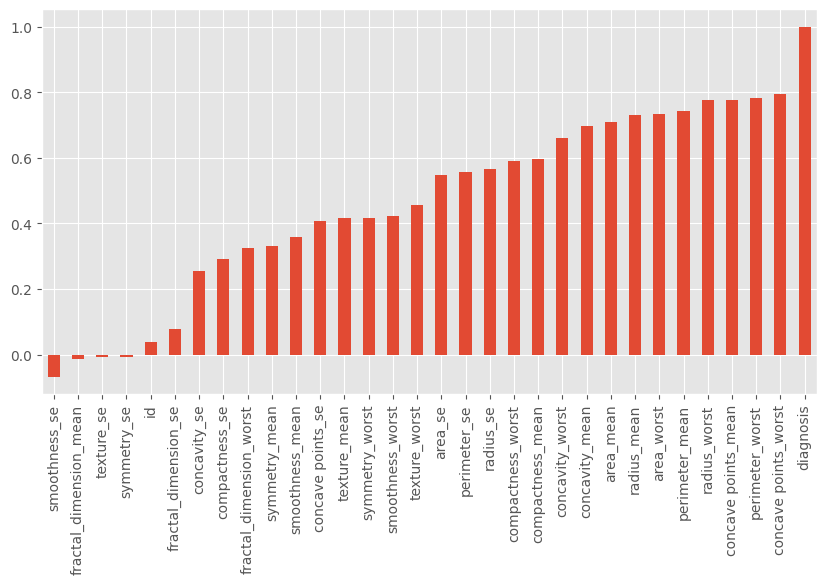

In [59]:
plt.figure(figsize=(10,5),dpi=100)
df.corr()['diagnosis'].sort_values().plot(kind='bar')
plt.show()

## Model Training

In [60]:
X = df.drop('diagnosis', axis=1).values
y = df['diagnosis'].values

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=77)

#### Scalling the data down to 0 to 1

In [62]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [63]:
X_train.shape

(455, 31)

In [64]:
model = Sequential()

model.add(Dense(30, activation='relu'))
model.add(Dense(15, activation='relu'))

# Binary Classification - last activation should be 'sigmoid'
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [65]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test, y_test))

Epoch 1/600
15/15 [==============================] - 1s 15ms/step - loss: 0.6914 - val_loss: 0.6737
Epoch 2/600
15/15 [==============================] - 0s 5ms/step - loss: 0.6613 - val_loss: 0.6466
Epoch 3/600
15/15 [==============================] - 0s 5ms/step - loss: 0.6352 - val_loss: 0.6192
Epoch 4/600
15/15 [==============================] - 0s 5ms/step - loss: 0.6049 - val_loss: 0.5866
Epoch 5/600
15/15 [==============================] - 0s 5ms/step - loss: 0.5661 - val_loss: 0.5477
Epoch 6/600
15/15 [==============================] - 0s 4ms/step - loss: 0.5221 - val_loss: 0.5020
Epoch 7/600
15/15 [==============================] - 0s 5ms/step - loss: 0.4748 - val_loss: 0.4496
Epoch 8/600
15/15 [==============================] - 0s 5ms/step - loss: 0.4160 - val_loss: 0.3940
Epoch 9/600
15/15 [==============================] - 0s 5ms/step - loss: 0.3635 - val_loss: 0.3459
Epoch 10/600
15/15 [==============================] - 0s 5ms/step - loss: 0.3196 - val_loss: 0.3069
Epoch 11

15/15 [==============================] - 0s 5ms/step - loss: 0.0481 - val_loss: 0.0855
Epoch 84/600
15/15 [==============================] - 0s 5ms/step - loss: 0.0466 - val_loss: 0.0840
Epoch 85/600
15/15 [==============================] - 0s 5ms/step - loss: 0.0448 - val_loss: 0.0863
Epoch 86/600
15/15 [==============================] - 0s 5ms/step - loss: 0.0458 - val_loss: 0.0848
Epoch 87/600
15/15 [==============================] - 0s 5ms/step - loss: 0.0455 - val_loss: 0.0838
Epoch 88/600
15/15 [==============================] - 0s 5ms/step - loss: 0.0461 - val_loss: 0.0829
Epoch 89/600
15/15 [==============================] - 0s 5ms/step - loss: 0.0442 - val_loss: 0.0865
Epoch 90/600
15/15 [==============================] - 0s 4ms/step - loss: 0.0457 - val_loss: 0.0829
Epoch 91/600
15/15 [==============================] - 0s 7ms/step - loss: 0.0465 - val_loss: 0.0832
Epoch 92/600
15/15 [==============================] - 0s 5ms/step - loss: 0.0442 - val_loss: 0.0822
Epoch 93/600


15/15 [==============================] - 0s 5ms/step - loss: 0.0315 - val_loss: 0.0835
Epoch 165/600
15/15 [==============================] - 0s 6ms/step - loss: 0.0303 - val_loss: 0.0868
Epoch 166/600
15/15 [==============================] - 0s 5ms/step - loss: 0.0326 - val_loss: 0.0837
Epoch 167/600
15/15 [==============================] - 0s 5ms/step - loss: 0.0315 - val_loss: 0.0828
Epoch 168/600
15/15 [==============================] - 0s 5ms/step - loss: 0.0309 - val_loss: 0.0830
Epoch 169/600
15/15 [==============================] - 0s 5ms/step - loss: 0.0306 - val_loss: 0.0840
Epoch 170/600
15/15 [==============================] - 0s 5ms/step - loss: 0.0303 - val_loss: 0.0828
Epoch 171/600
15/15 [==============================] - 0s 5ms/step - loss: 0.0311 - val_loss: 0.0855
Epoch 172/600
15/15 [==============================] - 0s 4ms/step - loss: 0.0311 - val_loss: 0.0840
Epoch 173/600
15/15 [==============================] - 0s 5ms/step - loss: 0.0296 - val_loss: 0.0829
Epoc

15/15 [==============================] - 0s 5ms/step - loss: 0.0222 - val_loss: 0.0816
Epoch 246/600
15/15 [==============================] - 0s 5ms/step - loss: 0.0297 - val_loss: 0.0872
Epoch 247/600
15/15 [==============================] - 0s 4ms/step - loss: 0.0284 - val_loss: 0.0824
Epoch 248/600
15/15 [==============================] - 0s 5ms/step - loss: 0.0259 - val_loss: 0.0897
Epoch 249/600
15/15 [==============================] - 0s 5ms/step - loss: 0.0238 - val_loss: 0.0809
Epoch 250/600
15/15 [==============================] - 0s 5ms/step - loss: 0.0235 - val_loss: 0.0872
Epoch 251/600
15/15 [==============================] - 0s 5ms/step - loss: 0.0248 - val_loss: 0.0824
Epoch 252/600
15/15 [==============================] - 0s 6ms/step - loss: 0.0231 - val_loss: 0.0840
Epoch 253/600
15/15 [==============================] - 0s 5ms/step - loss: 0.0225 - val_loss: 0.0864
Epoch 254/600
15/15 [==============================] - 0s 5ms/step - loss: 0.0222 - val_loss: 0.0832
Epoc

15/15 [==============================] - 0s 5ms/step - loss: 0.0224 - val_loss: 0.0891
Epoch 327/600
15/15 [==============================] - 0s 5ms/step - loss: 0.0174 - val_loss: 0.0869
Epoch 328/600
15/15 [==============================] - 0s 5ms/step - loss: 0.0155 - val_loss: 0.0885
Epoch 329/600
15/15 [==============================] - 0s 5ms/step - loss: 0.0161 - val_loss: 0.0862
Epoch 330/600
15/15 [==============================] - 0s 5ms/step - loss: 0.0150 - val_loss: 0.0913
Epoch 331/600
15/15 [==============================] - 0s 5ms/step - loss: 0.0141 - val_loss: 0.0876
Epoch 332/600
15/15 [==============================] - 0s 5ms/step - loss: 0.0155 - val_loss: 0.0860
Epoch 333/600
15/15 [==============================] - 0s 5ms/step - loss: 0.0144 - val_loss: 0.0965
Epoch 334/600
15/15 [==============================] - 0s 5ms/step - loss: 0.0149 - val_loss: 0.0899
Epoch 335/600
15/15 [==============================] - 0s 5ms/step - loss: 0.0156 - val_loss: 0.0963
Epoc

15/15 [==============================] - 0s 5ms/step - loss: 0.0102 - val_loss: 0.0979
Epoch 408/600
15/15 [==============================] - 0s 5ms/step - loss: 0.0100 - val_loss: 0.1042
Epoch 409/600
15/15 [==============================] - 0s 5ms/step - loss: 0.0094 - val_loss: 0.0945
Epoch 410/600
15/15 [==============================] - 0s 5ms/step - loss: 0.0116 - val_loss: 0.1152
Epoch 411/600
15/15 [==============================] - 0s 5ms/step - loss: 0.0104 - val_loss: 0.0977
Epoch 412/600
15/15 [==============================] - 0s 5ms/step - loss: 0.0099 - val_loss: 0.1046
Epoch 413/600
15/15 [==============================] - 0s 5ms/step - loss: 0.0093 - val_loss: 0.0968
Epoch 414/600
15/15 [==============================] - 0s 5ms/step - loss: 0.0095 - val_loss: 0.1060
Epoch 415/600
15/15 [==============================] - 0s 5ms/step - loss: 0.0097 - val_loss: 0.0996
Epoch 416/600
15/15 [==============================] - 0s 5ms/step - loss: 0.0095 - val_loss: 0.1078
Epoc

15/15 [==============================] - 0s 5ms/step - loss: 0.0065 - val_loss: 0.1123
Epoch 489/600
15/15 [==============================] - 0s 5ms/step - loss: 0.0063 - val_loss: 0.1211
Epoch 490/600
15/15 [==============================] - 0s 5ms/step - loss: 0.0068 - val_loss: 0.1112
Epoch 491/600
15/15 [==============================] - 0s 5ms/step - loss: 0.0065 - val_loss: 0.1161
Epoch 492/600
15/15 [==============================] - 0s 5ms/step - loss: 0.0107 - val_loss: 0.1296
Epoch 493/600
15/15 [==============================] - 0s 5ms/step - loss: 0.0079 - val_loss: 0.1126
Epoch 494/600
15/15 [==============================] - 0s 5ms/step - loss: 0.0076 - val_loss: 0.1230
Epoch 495/600
15/15 [==============================] - 0s 5ms/step - loss: 0.0068 - val_loss: 0.1217
Epoch 496/600
15/15 [==============================] - 0s 5ms/step - loss: 0.0064 - val_loss: 0.1176
Epoch 497/600
15/15 [==============================] - 0s 5ms/step - loss: 0.0063 - val_loss: 0.1199
Epoc

15/15 [==============================] - 0s 5ms/step - loss: 0.0051 - val_loss: 0.1225
Epoch 570/600
15/15 [==============================] - 0s 5ms/step - loss: 0.0041 - val_loss: 0.1346
Epoch 571/600
15/15 [==============================] - 0s 4ms/step - loss: 0.0038 - val_loss: 0.1285
Epoch 572/600
15/15 [==============================] - 0s 4ms/step - loss: 0.0037 - val_loss: 0.1269
Epoch 573/600
15/15 [==============================] - 0s 4ms/step - loss: 0.0037 - val_loss: 0.1315
Epoch 574/600
15/15 [==============================] - 0s 4ms/step - loss: 0.0036 - val_loss: 0.1262
Epoch 575/600
15/15 [==============================] - 0s 5ms/step - loss: 0.0038 - val_loss: 0.1367
Epoch 576/600
15/15 [==============================] - 0s 4ms/step - loss: 0.0036 - val_loss: 0.1272
Epoch 577/600
15/15 [==============================] - 0s 5ms/step - loss: 0.0038 - val_loss: 0.1279
Epoch 578/600
15/15 [==============================] - 0s 4ms/step - loss: 0.0046 - val_loss: 0.1359
Epoc

In [66]:
losses = pd.DataFrame(model.history.history)

In [67]:
losses.head()

,loss,val_loss
0,0.691411,0.673739
1,0.661338,0.646560
2,0.635213,0.619220
3,0.604881,0.586582
4,0.566147,0.547730


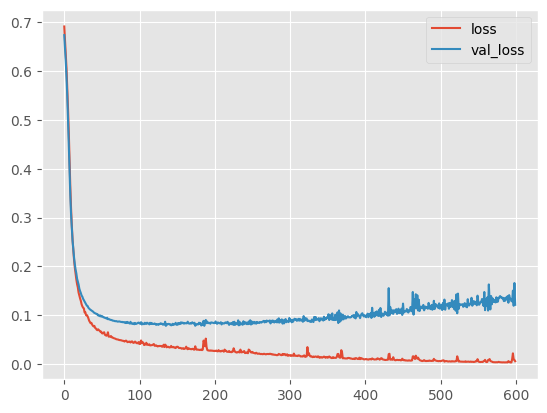

In [68]:
losses.plot()
plt.show()

#### Using callback to get the optimal gradient descent

In [70]:
model = Sequential()

model.add(Dense(30, activation='relu'))
model.add(Dense(15, activation='relu'))

# Binary Classification - last activation should be 'sigmoid'
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [71]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', patience=25, verbose=True)

In [73]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test, y_test),
                    callbacks=[early_stop])

Epoch 1/600
15/15 [==============================] - 1s 15ms/step - loss: 0.6695 - val_loss: 0.6493
Epoch 2/600
15/15 [==============================] - 0s 5ms/step - loss: 0.6428 - val_loss: 0.6230
Epoch 3/600
15/15 [==============================] - 0s 5ms/step - loss: 0.6140 - val_loss: 0.5931
Epoch 4/600
15/15 [==============================] - 0s 5ms/step - loss: 0.5795 - val_loss: 0.5545
Epoch 5/600
15/15 [==============================] - 0s 5ms/step - loss: 0.5343 - val_loss: 0.5069
Epoch 6/600
15/15 [==============================] - 0s 5ms/step - loss: 0.4790 - val_loss: 0.4524
Epoch 7/600
15/15 [==============================] - 0s 5ms/step - loss: 0.4258 - val_loss: 0.4033
Epoch 8/600
15/15 [==============================] - 0s 5ms/step - loss: 0.3777 - val_loss: 0.3678
Epoch 9/600
15/15 [==============================] - 0s 5ms/step - loss: 0.3381 - val_loss: 0.3272
Epoch 10/600
15/15 [==============================] - 0s 5ms/step - loss: 0.3034 - val_loss: 0.3017
Epoch 11

15/15 [==============================] - 0s 5ms/step - loss: 0.0454 - val_loss: 0.0758
Epoch 84/600
15/15 [==============================] - 0s 5ms/step - loss: 0.0438 - val_loss: 0.0761
Epoch 85/600
15/15 [==============================] - 0s 5ms/step - loss: 0.0479 - val_loss: 0.0778
Epoch 86/600
15/15 [==============================] - 0s 5ms/step - loss: 0.0445 - val_loss: 0.0760
Epoch 87/600
15/15 [==============================] - 0s 5ms/step - loss: 0.0460 - val_loss: 0.0764
Epoch 88/600
15/15 [==============================] - 0s 5ms/step - loss: 0.0429 - val_loss: 0.0760
Epoch 89/600
15/15 [==============================] - 0s 5ms/step - loss: 0.0426 - val_loss: 0.0766
Epoch 90/600
15/15 [==============================] - 0s 5ms/step - loss: 0.0417 - val_loss: 0.0758
Epoch 91/600
15/15 [==============================] - 0s 4ms/step - loss: 0.0410 - val_loss: 0.0751
Epoch 92/600
15/15 [==============================] - 0s 5ms/step - loss: 0.0407 - val_loss: 0.0749
Epoch 93/600


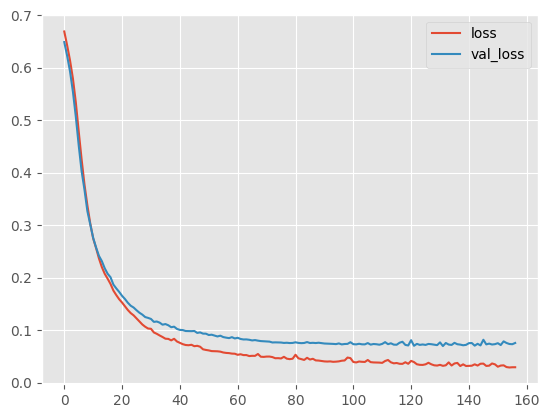

In [75]:
losses = pd.DataFrame(model.history.history)
losses.plot()
plt.show()

#### Using dropout layers to prevent overfitting

In [77]:
model = Sequential()

model.add(Dense(30, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(15, activation='relu'))
model.add(Dropout(0.5))

# Binary Classification - last activation should be 'sigmoid'
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [78]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test, y_test),
                    callbacks=[early_stop])

Epoch 1/600
15/15 [==============================] - 1s 16ms/step - loss: 0.6922 - val_loss: 0.6727
Epoch 2/600
15/15 [==============================] - 0s 5ms/step - loss: 0.6723 - val_loss: 0.6567
Epoch 3/600
15/15 [==============================] - 0s 5ms/step - loss: 0.6482 - val_loss: 0.6420
Epoch 4/600
15/15 [==============================] - 0s 6ms/step - loss: 0.6353 - val_loss: 0.6112
Epoch 5/600
15/15 [==============================] - 0s 6ms/step - loss: 0.6135 - val_loss: 0.5763
Epoch 6/600
15/15 [==============================] - 0s 5ms/step - loss: 0.5907 - val_loss: 0.5396
Epoch 7/600
15/15 [==============================] - 0s 5ms/step - loss: 0.5504 - val_loss: 0.5089
Epoch 8/600
15/15 [==============================] - 0s 5ms/step - loss: 0.5407 - val_loss: 0.4760
Epoch 9/600
15/15 [==============================] - 0s 5ms/step - loss: 0.5162 - val_loss: 0.4481
Epoch 10/600
15/15 [==============================] - 0s 6ms/step - loss: 0.5021 - val_loss: 0.4207
Epoch 11

15/15 [==============================] - 0s 6ms/step - loss: 0.1042 - val_loss: 0.1118
Epoch 84/600
15/15 [==============================] - 0s 6ms/step - loss: 0.0872 - val_loss: 0.1118
Epoch 85/600
15/15 [==============================] - 0s 5ms/step - loss: 0.0950 - val_loss: 0.1125
Epoch 86/600
15/15 [==============================] - 0s 5ms/step - loss: 0.0835 - val_loss: 0.1091
Epoch 87/600
15/15 [==============================] - 0s 5ms/step - loss: 0.0910 - val_loss: 0.1071
Epoch 88/600
15/15 [==============================] - 0s 5ms/step - loss: 0.1178 - val_loss: 0.1006
Epoch 89/600
15/15 [==============================] - 0s 5ms/step - loss: 0.0907 - val_loss: 0.1022
Epoch 90/600
15/15 [==============================] - 0s 5ms/step - loss: 0.0915 - val_loss: 0.1030
Epoch 91/600
15/15 [==============================] - 0s 5ms/step - loss: 0.0902 - val_loss: 0.1033
Epoch 92/600
15/15 [==============================] - 0s 5ms/step - loss: 0.0923 - val_loss: 0.1047
Epoch 93/600


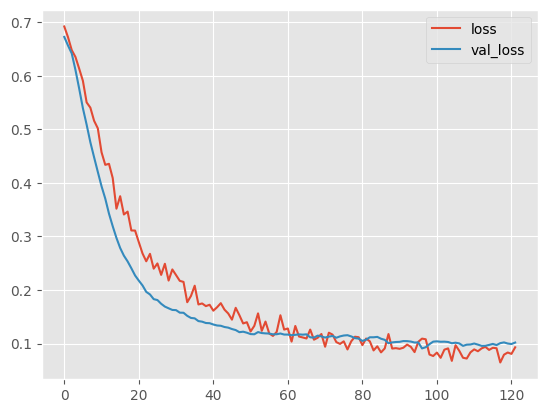

In [79]:
losses = pd.DataFrame(model.history.history)
losses.plot()
plt.show()

#### Evaluation

In [87]:
predictions = (model.predict(X_test) > 0.5).astype("int32")

4/4 [==============================] - 0s 3ms/step


In [89]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97        75
           1       0.95      0.92      0.94        39

    accuracy                           0.96       114
   macro avg       0.95      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [91]:
print(confusion_matrix(y_test, predictions))

[[73  2]
 [ 3 36]]
